In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\MSFT.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-26,231.169998,238.300003,230.059998,231.320007,229.106659,82543200
1,2022-10-27,231.039993,233.690002,225.779999,226.750000,224.580368,40424600
2,2022-10-28,226.240005,236.600006,226.050003,235.869995,233.613113,40647700
3,2022-10-31,233.759995,234.919998,231.149994,232.130005,229.908905,28357300
4,2022-11-01,234.600006,235.740005,227.330002,228.169998,225.986786,30592300
...,...,...,...,...,...,...,...
246,2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100
247,2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600
248,2023-10-23,325.470001,332.730011,324.390015,329.320007,329.320007,24374700
249,2023-10-24,331.299988,331.839996,327.600006,330.529999,330.529999,31153600


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-10-26,231.320007
1,2022-10-27,226.750000
2,2022-10-28,235.869995
3,2022-10-31,232.130005
4,2022-11-01,228.169998
...,...,...
246,2023-10-19,331.320007
247,2023-10-20,326.670013
248,2023-10-23,329.320007
249,2023-10-24,330.529999


In [3]:
df['Date']

0      2022-10-26
1      2022-10-27
2      2022-10-28
3      2022-10-31
4      2022-11-01
          ...    
246    2023-10-19
247    2023-10-20
248    2023-10-23
249    2023-10-24
250    2023-10-25
Name: Date, Length: 251, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2022-10-26,231.320007
1,2022-10-27,226.750000
2,2022-10-28,235.869995
3,2022-10-31,232.130005
4,2022-11-01,228.169998
...,...,...
246,2023-10-19,331.320007
247,2023-10-20,326.670013
248,2023-10-23,329.320007
249,2023-10-24,330.529999


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\rahul\AppData\Local\Temp\ipykernel_5132\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-10-26
1     2022-10-27
2     2022-10-28
3     2022-10-31
4     2022-11-01
         ...    
246   2023-10-19
247   2023-10-20
248   2023-10-23
249   2023-10-24
250   2023-10-25
Name: Date, Length: 251, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2022-10-26,231.320007
2022-10-27,226.750000
2022-10-28,235.869995
2022-10-31,232.130005
2022-11-01,228.169998
...,...
2023-10-19,331.320007
2023-10-20,326.670013
2023-10-23,329.320007


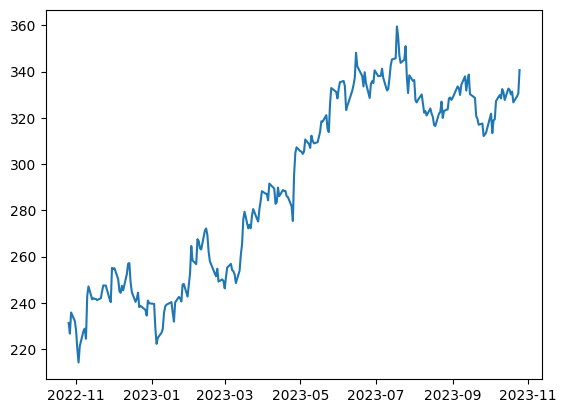

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [28]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2022-11-01',  # Adjust the start date
                                '2023-10-25',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-01,226.750000,235.869995,232.130005,228.169998
1,2022-11-02,235.869995,232.130005,228.169998,220.100006
2,2022-11-03,232.130005,228.169998,220.100006,214.250000
3,2022-11-04,228.169998,220.100006,214.250000,221.389999
4,2022-11-07,220.100006,214.250000,221.389999,227.869995
...,...,...,...,...,...
242,2023-10-19,332.640015,332.059998,330.109985,331.320007
243,2023-10-20,332.059998,330.109985,331.320007,326.670013
244,2023-10-23,330.109985,331.320007,326.670013,329.320007
245,2023-10-24,331.320007,326.670013,329.320007,330.529999


In [29]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((247,), (247, 3, 1), (247,))

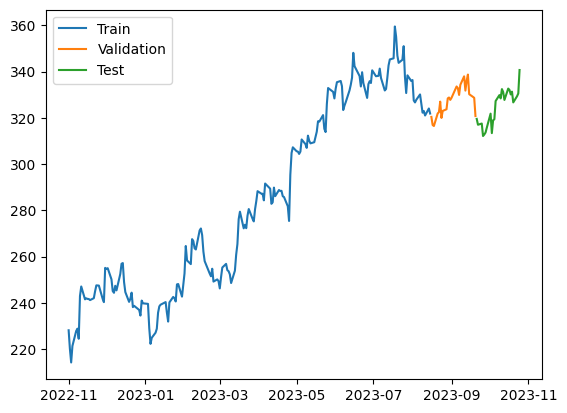

In [30]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 110ms/step - loss: 81743.9688 - mean_absolute_error: 283.1162 - val_loss: 107119.4297 - val_mean_absolute_error: 327.2338
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 81568.8750 - mean_absolute_error: 282.8070 - val_loss: 106803.9609 - val_mean_absolute_error: 326.7514
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 81193.8359 - mean_absolute_error: 282.1461 - val_loss: 106241.5703 - val_mean_absolute_error: 325.8897
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 80715.0078 - mean_absolute_error: 281.2938 - val_loss: 105680.0234 - val_mean_absolute_error: 325.0270
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 80224.2188 - mean_absolute_error: 280.4185 - val_loss: 105058.6328 - val_mean_absolute_error: 324.0697
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 79620.8750 - mean_absolute_error: 279.3469 - val_loss

7/7 [==============================] - 0s 2ms/step


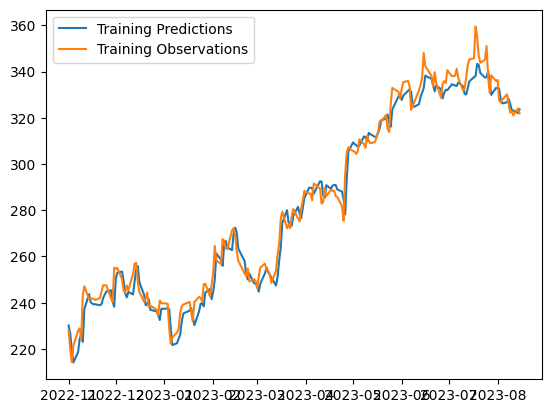

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 23ms/step


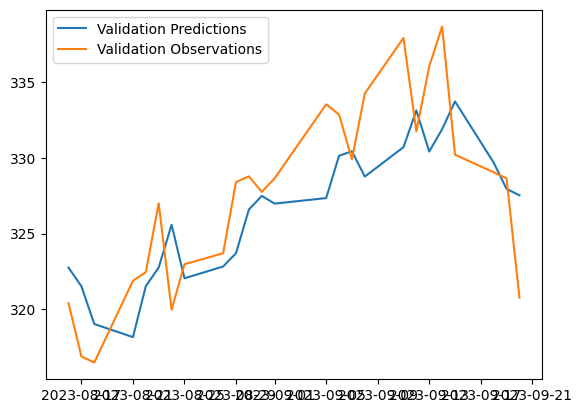

In [33]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


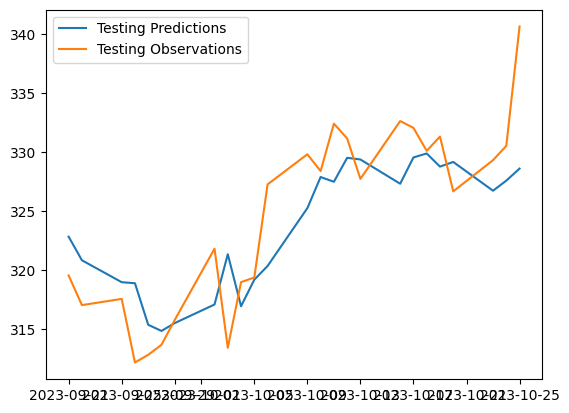

In [35]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

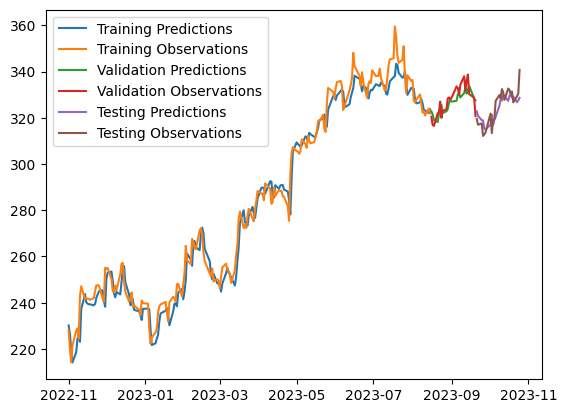

In [36]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [37]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


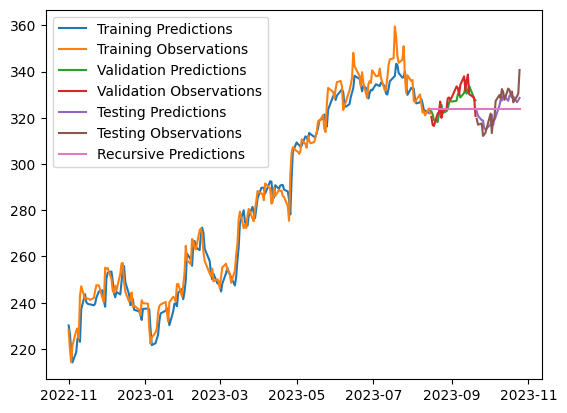

In [38]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])